In [91]:
import sys
sys.path.append("/Users/alfieriek/Documents/GitHub/imputationLibrary")
from imputationLibrary import forwardFilling, randomSampleImputation
from imputationLibrary.util import util
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
import random
import numpy as np
warnings.filterwarnings('ignore')

TRAINING_SIZE = 749
TESTING_SIZE=250

files = ['seasonal_and_trend']

In [92]:
def remove_random_points(df_input, num_missing=200):
    df = df_input.copy()
    missing_places = random.sample(range(df.shape[0]), num_missing)
    for missing_place in missing_places:
        df.iloc[missing_place] = np.nan
    return df

# Seasonal and Trend Data with Forward Filling Imputations

In [93]:
# Reading Dataset
SeasonalTrend_Data = pd.read_csv('output/seasonal_and_trend_complete.csv', index_col=0)
SeasonalTrend_Data

,0
0,2.962612
1,3.405728
2,2.290910
3,2.603546
4,2.106807
...,...
995,92.185713
996,88.912198
997,88.058936
998,93.694939


In [94]:
# Removing 200 datapoints
SeasonalTrend_Data_NAs = remove_random_points(SeasonalTrend_Data, num_missing=200)
SeasonalTrend_Data_NAs

,0
0,2.962612
1,3.405728
2,2.290910
3,2.603546
4,2.106807
...,...
995,NaN
996,88.912198
997,88.058936
998,93.694939


In [95]:
# Forward Filing Imputing
SeasonalTrend_Data_NAs_Imputed = forwardFilling.inputTrainingData(SeasonalTrend_Data_NAs)
SeasonalTrend_Data_NAs_Imputed

,0
0,2.962612
1,3.405728
2,2.290910
3,2.603546
4,2.106807
...,...
995,95.604457
996,88.912198
997,88.058936
998,93.694939


In [96]:
# Mean Square Error
mse = mean_squared_error(SeasonalTrend_Data_NAs_Imputed,SeasonalTrend_Data, squared=True)
mse

3.86723406400483

Forward Filling Imputation


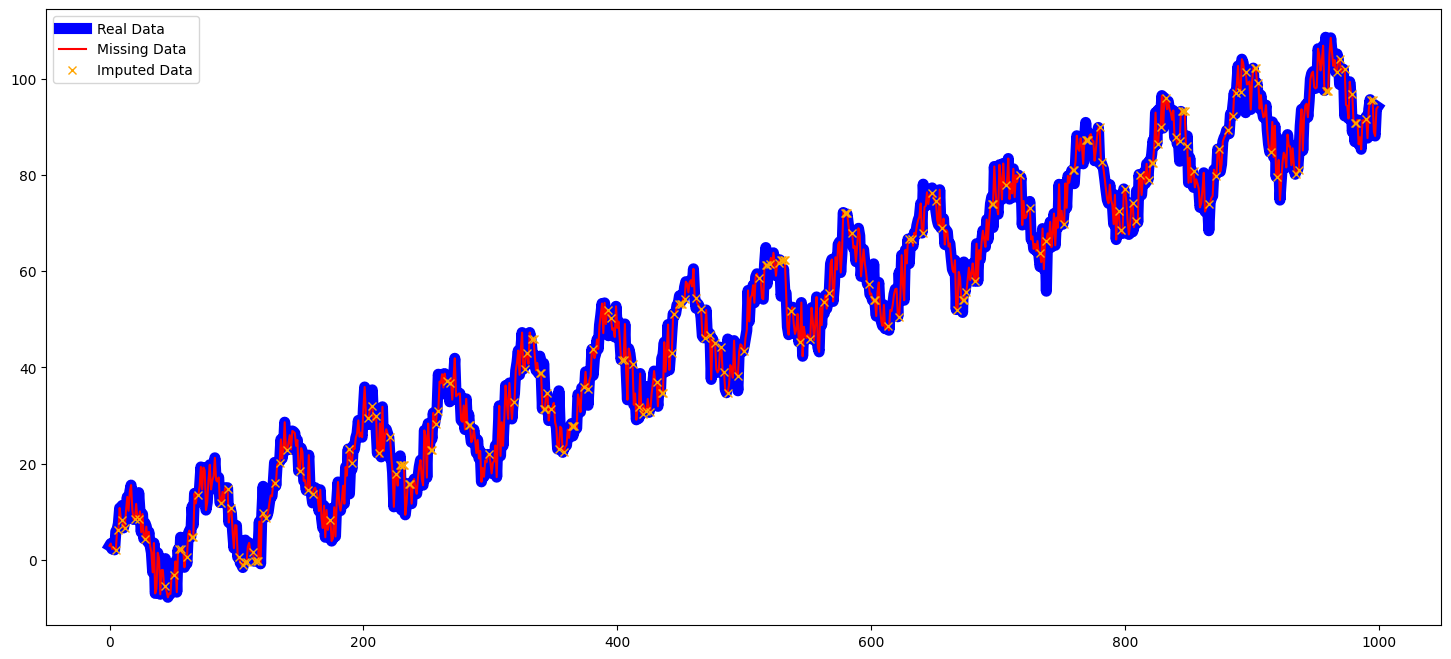

In [97]:
print("Forward Filling Imputation")
util.plot(SeasonalTrend_Data, SeasonalTrend_Data_NAs, SeasonalTrend_Data_NAs_Imputed)

# Seasonal and Trend Data with Random Sample Imputation

In [103]:
# Random Sample Imputation
randomSampleImputation.inputData(SeasonalTrend_Data_NAs, sliding_window_size = 0.03)

ValueError: Data must be 1-dimensional

In [104]:
import math

def RSF(training_df, sliding_window_size=0.1):
    imputed_df = training_df.copy()
    for index, row in imputed_df.iterrows():
        if row.isna().sum() >= 1:  # Check if there's at least one NaN in the row
            nan_columns = row[row.isna()].index  # Get column names with NaN values
            for col in nan_columns:
                row_index = imputed_df.index.get_loc(index)
                rand_row = row_index
                window_size = sliding_window_size
                while np.isnan(imputed_df.iloc[rand_row, imputed_df.columns.get_loc(col)]):
                    lower_bound = max(0, row_index - math.ceil((imputed_df.shape[0] - 1) * window_size))
                    upper_bound = min(row_index + math.ceil((imputed_df.shape[0] - 1) * window_size), training_df.shape[0] - 1)
                    rand_row = random.randint(lower_bound, upper_bound)
                    window_size += 0.02
                imputed_df.iloc[row_index, imputed_df.columns.get_loc(col)] = imputed_df.iloc[rand_row, imputed_df.columns.get_loc(col)]
    return imputed_df

In [105]:
RSF(SeasonalTrend_Data_NAs, sliding_window_size = 0.03)

,0
0,2.962612
1,3.405728
2,2.290910
3,2.603546
4,2.106807
...,...
995,85.044446
996,88.912198
997,88.058936
998,93.694939


Random Sample Imputation


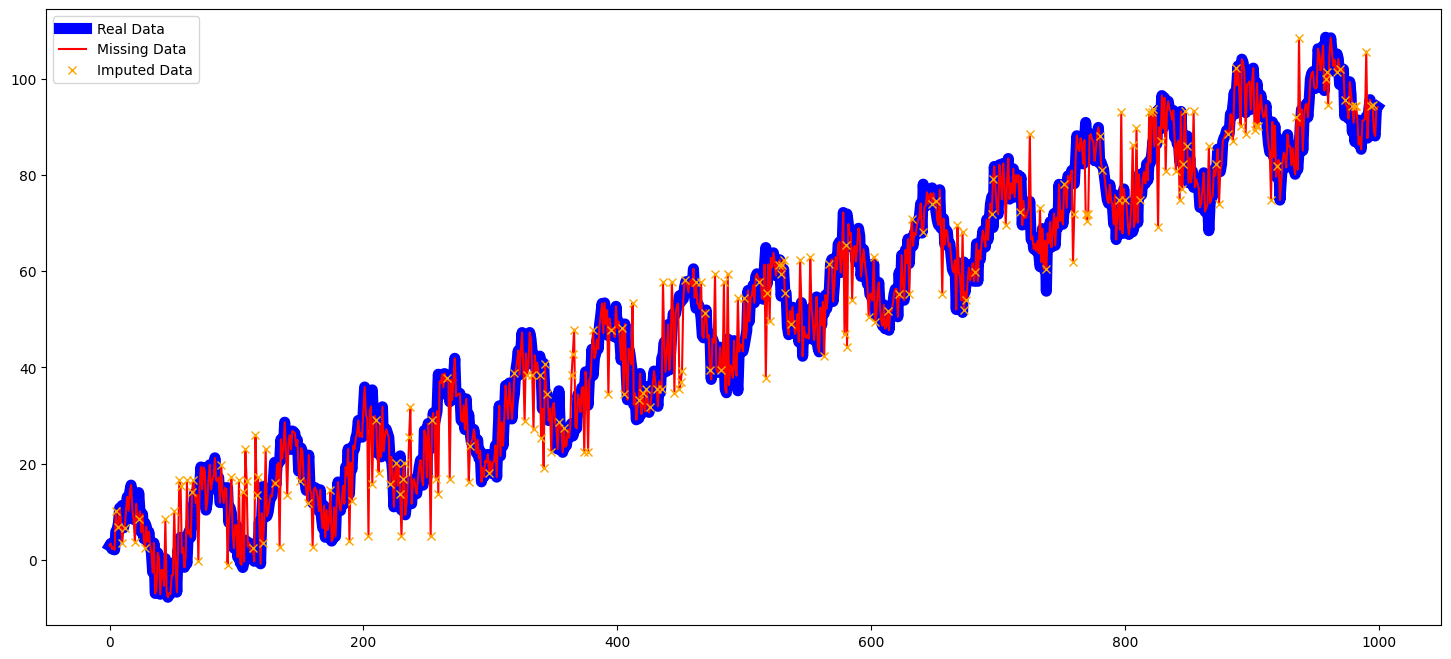

In [106]:
print("Random Sample Imputation")
util.plot(SeasonalTrend_Data, SeasonalTrend_Data_NAs, RSF(SeasonalTrend_Data_NAs, sliding_window_size = 0.03))